# Data Exploration and Demographic Filtering

In this notebook we go through the movies_metadata.csv file from the TMDB dataset on Kaggle

We make some explorations to figure out different languages, production companies etc. 

We finally implement the simplest recommendation system, demographic filtering, to rank and suggest movies to users based on the genre.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
%matplotlib inline

sns.set_style('darkgrid')
sns.set_context('talk')

In [4]:
# Read in the csv file
df_mmd = pd.read_csv('../data/movies_metadata.csv')

/Users/ranajoyb/opt/anaconda3/envs/cmb/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_mmd.describe(include='all')

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
count,45466,4494,45466,45466,7782,45466,45449,45455,45466,44512,...,45379,4.546000e+04,45203.000000,45460,45379,20412,45460,45460,45460.000000,45460.000000
unique,5,1698,1226,4069,7673,45436,45417,92,43373,44307,...,17336,NaN,NaN,1931,6,20283,42277,2,NaN,NaN
top,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",http://www.georgecarlin.com,141971,tt1180333,en,Hamlet,No overview found.,...,2008-01-01,NaN,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Cinderella,False,NaN,NaN
freq,45454,29,36573,5000,12,3,3,32269,8,133,...,136,NaN,NaN,22395,45014,7,11,45367,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.120935e+07,94.128199,NaN,NaN,NaN,NaN,NaN,5.618207,109.897338
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.433225e+07,38.407810,NaN,NaN,NaN,NaN,NaN,1.924216,491.310374
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,85.000000,NaN,NaN,NaN,NaN,NaN,5.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,95.000000,NaN,NaN,NaN,NaN,NaN,6.000000,10.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000000e+00,107.000000,NaN,NaN,NaN,NaN,NaN,6.800000,34.000000


In [6]:
df_mmd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
df_mmd.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
# Drop columns not needed at all
df_mmd.drop(['homepage', 'imdb_id', 'original_title', 'poster_path', 'video', 'belongs_to_collection', 'revenue', 'tagline', 'id', 'overview', 'spoken_languages', 'production_countries'], axis=1, inplace=True)

# Drop adult movies
adult_index = df_mmd[df_mmd['adult'] == 'True'].index
df_mmd.drop(axis=0, index=adult_index, inplace=True)
df_mmd.drop(['adult'], axis=1, inplace=True)

# Keep only English movies
non_english_index = df_mmd[df_mmd.original_language != 'en'].index
df_mmd.drop(axis=0, index=non_english_index, inplace=True)
df_mmd.drop(['original_language'], axis=1, inplace=True)

# Only released movies
df_mmd.drop(axis=0, index=df_mmd[df_mmd.status != 'Released'].index, inplace=True)
df_mmd.drop(['status'], axis=1, inplace=True)

In [5]:
# Extract genres
df_mmd.genres = df_mmd.genres.map(lambda col_str: [col_dict['name'] for col_dict in eval(col_str)])

# Extract production companies
df_mmd.production_companies = df_mmd.production_companies.map(lambda col_str: [col_dict['name'] for col_dict in eval(col_str)])

# Transform release date and keep only year
df_mmd['release_year'] = pd.to_datetime(df_mmd.release_date).dt.year
df_mmd.drop(['release_date'], axis=1, inplace=True)

# Convert popularity to float
df_mmd.popularity = df_mmd.popularity.map(str).map(eval)



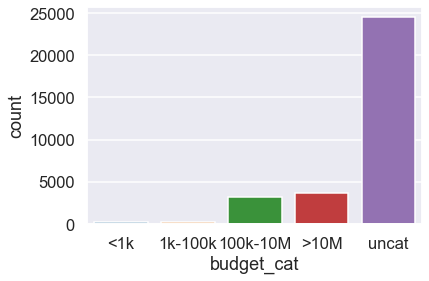

In [6]:
# Convert budget to float
df_mmd.budget = df_mmd.budget.map(str).map(eval)

# Categorising budgets
df_mmd['budget_cat'] = pd.cut(df_mmd.budget, bins=[0,1000,100000,10000000,1000000000], labels=["<1k", "1k-100k", "100k-10M", ">10M"])
df_mmd.budget_cat = df_mmd.budget_cat.cat.add_categories('uncat')
df_mmd.budget_cat.fillna('uncat', inplace=True)
df_mmd.drop(['budget'], axis=1, inplace=True)
sns.countplot(x="budget_cat", data=df_mmd)

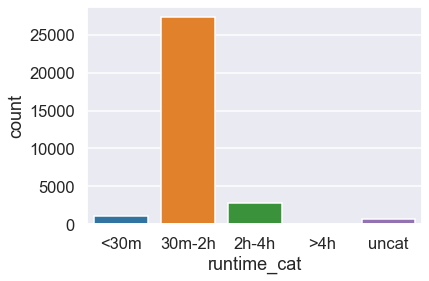

In [7]:
# Categorising run times
df_mmd['runtime_cat'] = pd.cut(df_mmd.runtime, bins=[0,30,120,480,1256], labels=["<30m", "30m-2h", "2h-4h", ">4h"], right=True)
df_mmd.runtime_cat = df_mmd.runtime_cat.cat.add_categories('uncat')
df_mmd.runtime_cat.fillna('uncat', inplace=True)
df_mmd.drop(['runtime'], axis=1, inplace=True)
sns.countplot(x="runtime_cat", data=df_mmd)

In [8]:
df_mmd.head()

,genres,popularity,production_companies,title,vote_average,vote_count,release_year,budget_cat,runtime_cat
0,"[Animation, Comedy, Family]",21.946943,[Pixar Animation Studios],Toy Story,7.7,5415.0,1995.0,>10M,30m-2h
1,"[Adventure, Fantasy, Family]",17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",Jumanji,6.9,2413.0,1995.0,>10M,30m-2h
2,"[Romance, Comedy]",11.712900,"[Warner Bros., Lancaster Gate]",Grumpier Old Men,6.5,92.0,1995.0,uncat,30m-2h
3,"[Comedy, Drama, Romance]",3.859495,[Twentieth Century Fox Film Corporation],Waiting to Exhale,6.1,34.0,1995.0,>10M,2h-4h
4,[Comedy],8.387519,"[Sandollar Productions, Touchstone Pictures]",Father of the Bride Part II,5.7,173.0,1995.0,uncat,30m-2h


In [9]:
df_mmd.describe(include='all')

,genres,popularity,production_companies,title,vote_average,vote_count,release_year,budget_cat,runtime_cat
count,31948,31948.000000,31948,31948,31948.000000,31948.000000,31889.000000,31948,31948
unique,3296,NaN,15526,30074,NaN,NaN,NaN,5,5
top,[Drama],NaN,[],Cinderella,NaN,NaN,NaN,uncat,30m-2h
freq,2802,NaN,8427,8,NaN,NaN,NaN,24535,27360
mean,NaN,3.388849,NaN,NaN,5.497239,142.876236,1991.059331,NaN,NaN
std,NaN,6.899303,NaN,NaN,1.931433,577.287932,24.729931,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,0.000000,1878.000000,NaN,NaN
25%,NaN,0.412918,NaN,NaN,5.000000,3.000000,1978.000000,NaN,NaN
50%,NaN,1.270171,NaN,NaN,5.900000,10.000000,2000.000000,NaN,NaN
75%,NaN,4.871962,NaN,NaN,6.700000,43.250000,2010.000000,NaN,NaN


In [10]:
num_valid_pc = len(df_mmd[df_mmd.production_companies.map(len) > 0])
num_valid_gen = len(df_mmd[df_mmd.genres.map(len) > 0])
num_unique_pc = len(df_mmd.explode('production_companies')['production_companies'].unique())

print(f"Number of valid rown with production companies: {num_valid_pc}")
print(f"Number of valid rown with genres: {num_valid_gen}")
print(f"Number of unique production companies: {num_unique_pc}")

Number of valid rown with production companies: 23521
Number of valid rown with genres: 30298
Number of unique production companies: 16736


[Text(0, 0, 'Drama'),
 Text(0, 0, 'Comedy'),
 Text(0, 0, 'Thriller'),
 Text(0, 0, 'Romance'),
 Text(0, 0, 'Action'),
 Text(0, 0, 'Horror'),
 Text(0, 0, 'Documentary'),
 Text(0, 0, 'Crime'),
 Text(0, 0, 'Adventure'),
 Text(0, 0, 'Science Fiction'),
 Text(0, 0, 'Family'),
 Text(0, 0, 'Mystery'),
 Text(0, 0, 'Fantasy'),
 Text(0, 0, 'Music'),
 Text(0, 0, 'Animation'),
 Text(0, 0, 'War'),
 Text(0, 0, 'History'),
 Text(0, 0, 'Western'),
 Text(0, 0, 'TV Movie'),
 Text(0, 0, 'Foreign')]

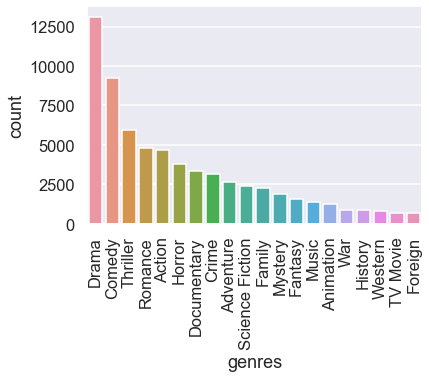

In [11]:
g = sns.countplot(x="genres", data=df_mmd.explode('genres'), order=df_mmd.explode('genres')['genres'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

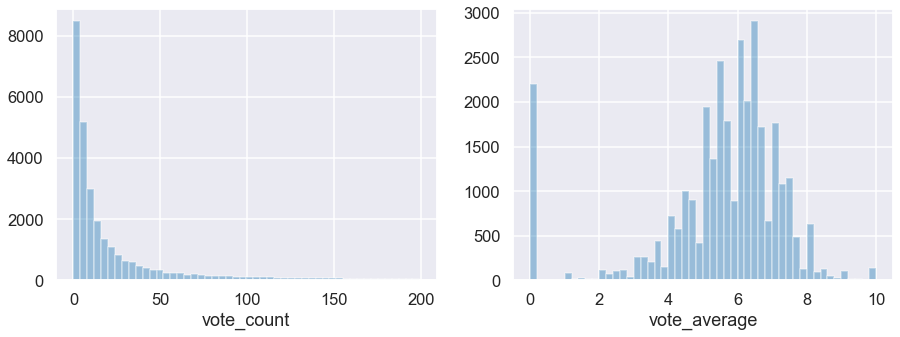

In [12]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(df_mmd[df_mmd.vote_count<200].vote_count, ax=axes[0], kde=False)
sns.distplot(df_mmd.vote_average, ax=axes[1], kde=False)

$$
WR = \left( \frac{v}{v+m} \right)R + \left( \frac{m}{v+m} \right)C
$$

where,
* $v$ is the number of votes for the movie
* $m$ is the minimum votes required to be listed in the chart
* $R$ is the average rating of the movie
* $C$ is the mean vote across the whole report

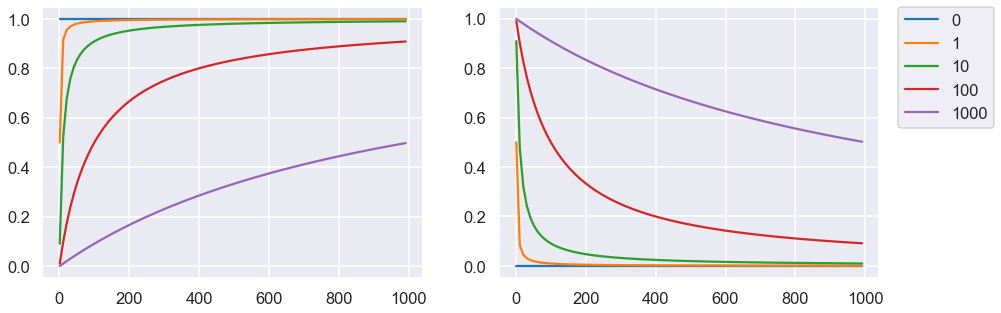

In [13]:
m_pars = [0,1,10,100,1000]
v = np.arange(1,1000,10)
f, axes = plt.subplots(1, 2, figsize=(15,5))
for m in m_pars:
    sns.lineplot(v, v/(v+m), ax=axes[0])
for m in m_pars:
    sns.lineplot(v, m/(v+m), ax=axes[1], label=int(m))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [14]:
def get_rating(df, m_qt):
    m = df.vote_count.quantile(m_qt)
    C = df.vote_count.dot(df.vote_average) / df.vote_count.sum()
    print(f"Value of m = {m} at {m_qt*100} percentile")
    print(f"Rating average C = {C:.3f}")
    v = df.vote_count
    R = df.vote_average
    return (v/(v+m))*R + (m/(v+m))*C

In [15]:
df_mmd['global_rating'] = get_rating(df_mmd, 0.9)
df_mmd.sort_values(by="global_rating", ascending=False)[['title']].head(10)

Value of m = 244.0 at 90.0 percentile
Rating average C = 6.662


,title
314,The Shawshank Redemption
834,The Godfather
12481,The Dark Knight
2843,Fight Club
292,Pulp Fiction
522,Schindler's List
23673,Whiplash
1178,The Godfather: Part II
1152,One Flew Over the Cuckoo's Nest
351,Forrest Gump


In [16]:
def genre_rating(genre):
    df_genre = df_mmd[df_mmd.genres.map(lambda c: True if genre in c else False)]
    df_mmd[genre+'_rating'] = get_rating(df_genre, 0.9)

In [17]:
def plot_prod_comp_by_genre(rating_col):
    f = plt.figure(figsize=(10,5))
    df_genre = df_mmd.sort_values(by=rating_col, ascending=False).head(100).explode('production_companies')
    g = sns.countplot(x='production_companies', data=df_genre, order=df_genre.production_companies.value_counts().iloc[:10].index)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)

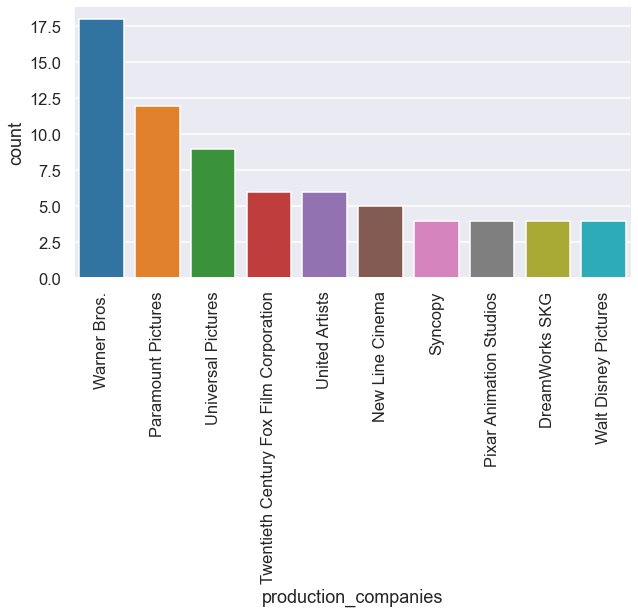

In [18]:
plot_prod_comp_by_genre('global_rating')

In [19]:
def get_genre_meterics(genre):
    genre_rating(genre)
    df_mmd.sort_values(by=genre+"_rating", ascending=False)[['title']].head(10)
    print(df_mmd.sort_values(by=genre+"_rating", ascending=False)[['title']].head(10))
    plot_prod_comp_by_genre(genre+'_rating')

Value of m = 317.0 at 90.0 percentile
Rating average C = 6.460
                                                   title
351                                         Forrest Gump
1225                                  Back to the Future
22841                           The Grand Budapest Hotel
22131                            The Wolf of Wall Street
30315                                         Inside Out
40882                                         La La Land
13724                                                 Up
24455                                         Big Hero 6
732    Dr. Strangelove or: How I Learned to Stop Worr...
1604                                     The Truman Show


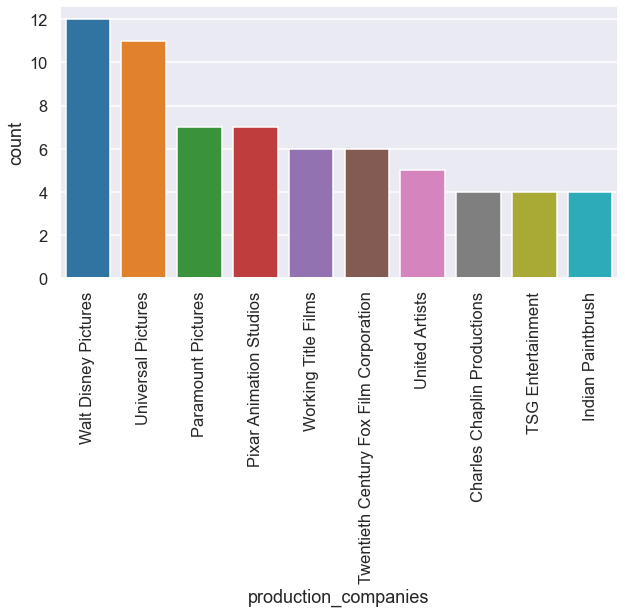

In [20]:
get_genre_meterics('Comedy')